# This file is used for exploring this specific data 


In [1]:
import os
import yaml
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from vnir_interactance_loader import VNIRInteractanceLoader


In [2]:
def load_yaml_file(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

In [3]:

cfg_dir = "/home/aneesh/sandbox/multi-modal/mangos/eda/config"
cfg_f   = "vnir_interactance.yaml"
cfg_filepath = os.path.join(cfg_dir, cfg_f)

cfg = load_yaml_file(cfg_filepath)


In [4]:
vnir_cfg = cfg['vnir_interactance']

In [16]:
loader = VNIRInteractanceLoader(vnir_cfg, normalize=True)
loader.load()

In [17]:
df = loader.get_features()
ids = loader.get_ids()

# ids
df

1         2         3         4         5         6         7     \
0    6.837751  6.833743  6.837569  6.841850  6.857977  6.865077  6.877750   
1    6.837912  6.838084  6.841541  6.835109  6.847570  6.850285  6.871817   
2    6.830637  6.838705  6.841316  6.847474  6.855346  6.858859  6.873226   
3    6.836442  6.835249  6.833452  6.840258  6.853362  6.851248  6.867110   
4    6.846135  6.840921  6.835679  6.836517  6.853077  6.855187  6.870531   
..        ...       ...       ...       ...       ...       ...       ...   
479  6.839712  6.837633  6.836678  6.837150  6.851598  6.857924  6.872646   
480  6.840953  6.834152  6.830799  6.833797  6.853468  6.861062  6.873557   
481  6.850666  6.846901  6.847018  6.843825  6.855251  6.854070  6.870126   
482  6.836001  6.830799  6.830442  6.835109  6.854629  6.857787  6.871589   
483  6.831241  6.826307  6.831598  6.829675  6.849777  6.852126  6.868786   

         8         9         10    ...      1637      1638      1639  \
0    6.873619  6.872698  6.851534  ...  7.001145  6.997084  6.990459   
1    6.866391  6.866506  6.847931  ...  7.044452  7.036667  7.032457   
2    6.864910  6.864441  6.849713  ...  7.038740  7.020834  7.015263   
3    6.860255  6.877925  6.858975  ...  6.997651  6.988773  6.977645   
4    6.861722  6.860328  6.838662  ...  6.994456  6.977403  6.963095   
..        ...       ...       ...  ...       ...       ...       ...   
479  6.865484  6.870687  6.855704  ...  7.123270  7.109381  7.098607   
480  6.857914  6.861753  6.839048  ...  7.080809  7.073964  7.067166   
481  6.860150  6.865964  6.848780  ...  7.058242  7.046221  7.038941   
482  6.858838  6.863260  6.843558  ...  7.044556  7.039888  7.038819   
483  6.860318  6.857987  6.844112  ...  7.061532  7.055028  7.051856   

         1640      1641      1642      1643      1644      1645      1646  
0    6.985438  6.983169  6.986150  6.983688  6.974161  6.960139  6.954744  
1    7.032262  7.037643  7.042513  7.043099  7.037941  7.029415  7.013151  
2    7.007854  7.013862  7.017452  7.010862  6.998765  6.986825  6.981062  
3    6.968596  6.969321  6.973290  6.969950  6.967655  6.956288  6.947351  
4    6.962149  6.966354  6.973871  6.969180  6.961628  6.948484  6.936469  
..        ...       ...       ...       ...       ...       ...       ...  
479  7.083522  7.084553  7.083338  7.080725  7.065946  7.049593  7.043885  
480  7.059085  7.063082  7.065750  7.060708  7.043780  7.023795  7.012151  
481  7.025298  7.036008  7.041762  7.043797  7.024115  7.011277  7.000088  
482  7.026658  7.029716  7.027350  7.034916  7.027350  7.016547  7.000070  
483  7.041027  7.038398  7.042190  7.041901  7.038003  7.022280  7.009815  

[484 rows x 1646 columns]

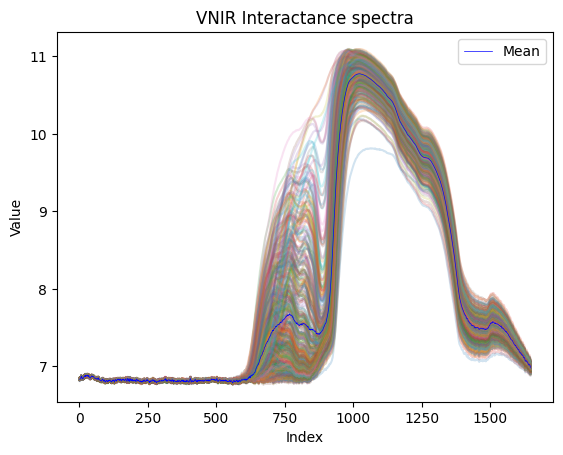

In [18]:
for row in range(len(df)):
#     print (row)
    plt.plot(df.iloc[row,:], alpha=0.2)

# Calculate and plot the mean
mean_values = df.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('VNIR Interactance spectra')

plt.show()
plt.show()

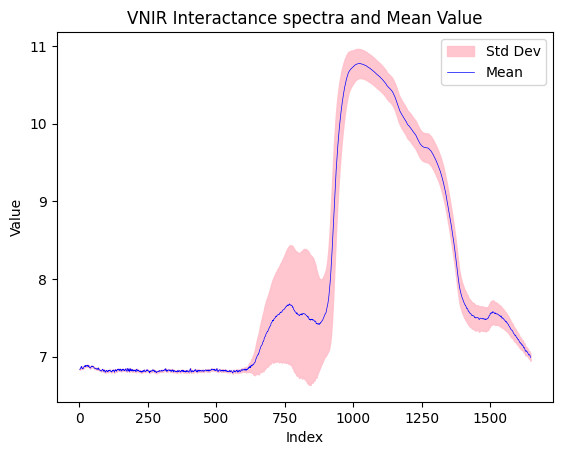

In [19]:
std_dev = df.std(axis=0)
# Plot the standard deviation as a shaded area
plt.fill_between(mean_values.index[:], 
                 mean_values.iloc[:] - std_dev.iloc[:], 
                 mean_values.iloc[:] + std_dev.iloc[:], 
                 color='pink', alpha=0.9, label='Std Dev')

#plot mean
#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')

# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('VNIR Interactance spectra and Mean Value')


plt.show()



In [20]:
# Noramlizations

In [21]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
# Fit and transform the data
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized = pd.DataFrame(scaler.fit_transform(df.T).T, columns=df.columns) #Apply normalization over rows

In [22]:
# df_normalized

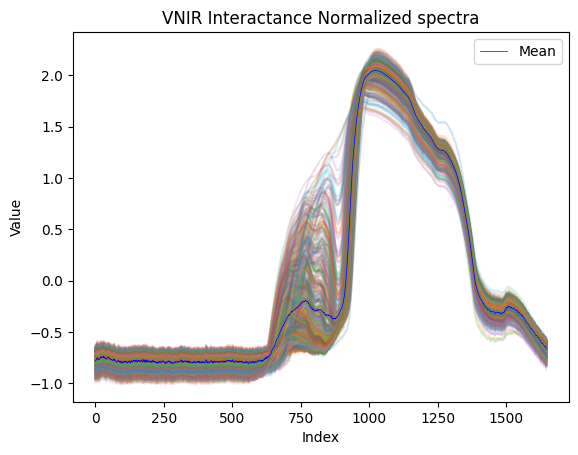

In [23]:
for row in range(len(df)):
#     print (row)
    plt.plot(df_normalized.iloc[row,:], alpha=0.2)

# Calculate and plot the mean
mean_values = df_normalized.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('VNIR Interactance Normalized spectra')

plt.show()
plt.show()

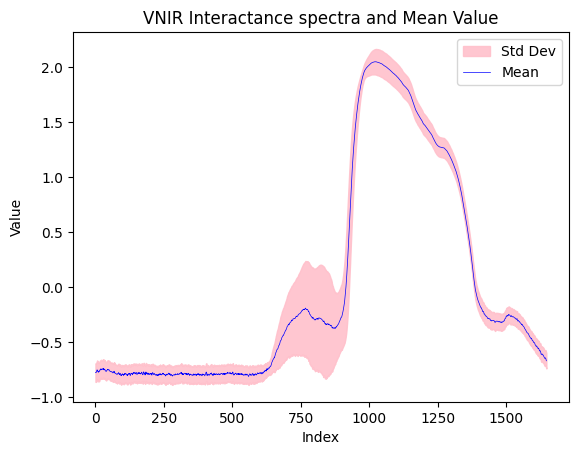

In [24]:
std_dev = df_normalized.std(axis=0)
# Plot the standard deviation as a shaded area
plt.fill_between(mean_values.index[:], 
                 mean_values.iloc[:] - std_dev.iloc[:], 
                 mean_values.iloc[:] + std_dev.iloc[:], 
                 color='pink', alpha=0.9, label='Std Dev')

#plot mean
#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')

# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('VNIR Interactance spectra and Mean Value')


plt.show()

In [25]:
#test data loader
data = [d for d in loader]

Could not retreive the feature for id 0. 0
Could not retreive the feature for id 195. 195
Could not retreive the feature for id 242. 242
Could not retreive the feature for id 288. 288
Could not retreive the feature for id 396. 396
Could not retreive the feature for id 404. 404
Could not retreive the feature for id 454. 454


Could not retreive the feature for id 0. 0
Could not retreive the feature for id 195. 195
Could not retreive the feature for id 242. 242
Could not retreive the feature for id 288. 288
Could not retreive the feature for id 396. 396
Could not retreive the feature for id 404. 404
Could not retreive the feature for id 454. 454


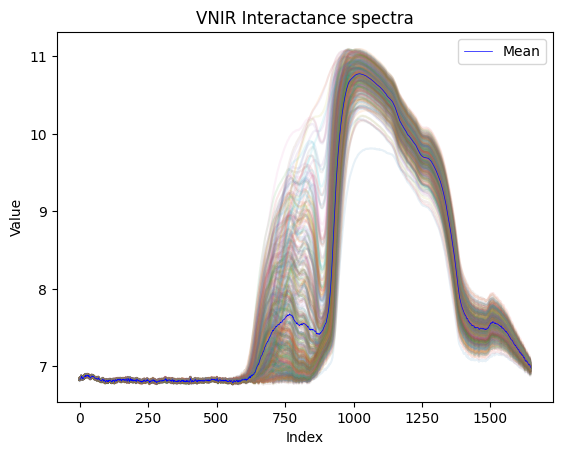

In [26]:
#Cheking the getitem functionality of the loader

data = [d for d in loader]

for d in data:
    if d is None:
        pass
    else:
        plt.plot(d, alpha=0.1)


# Calculate and plot the mean
mean_values = df.mean(axis=0)

#Plot also the mean
plt.plot(mean_values.iloc[:], color='blue', linewidth=0.5, label='Mean')


# Adding legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('VNIR Interactance spectra')

plt.show()